In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
#from torchsummary import summary
import torch.optim as optim
import time
import matplotlib
from torch.utils.data import DataLoader
import torch.utils.data as data
import numpy as np
import pandas as pd
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torch.nn import Sequential
import py_func.models_func as my_model
import py_func.dat_rb_func as drb
import py_func.Deep_learning_torch_func as DL

torch.manual_seed(0)


In [2]:
print(torch.__version__)

1.8.0


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [20]:
del model

In [ ]:
#EfficientNet

In [ ]:
model = torchvision.models.efficientnet_b7(pretrained=False)

In [ ]:
model.features[0][0]=Sequential(nn.Conv2d(1, 3, kernel_size=(3,3)),nn.BatchNorm2d(3),nn.ReLU(),
                                nn.Conv2d(3, 64, kernel_size=(3,3), stride=(2, 2), padding=(1, 1), bias=False))

In [ ]:
#Resnext

In [21]:
model=torchvision.models.resnext101_32x8d(pretrained=False)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [14]:
# model.conv1.in_channels=1
# model.conv1.groups=1
# model.fc.out_features = 10
# model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [22]:
model.conv1 = Sequential(nn.Conv2d(1, 3, kernel_size=(3,3)),nn.BatchNorm2d(3),nn.ReLU(),nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False))
model.fc.out_features = 10


In [3]:
# model=torchvision.models.resnet152(pretrained=False)
# model.conv1 = Sequential(nn.Conv2d(1, 3, kernel_size=(3,3)),nn.BatchNorm2d(3),nn.ReLU(),nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False))
# model.fc.out_features = 10
# model.to(device)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps

In [23]:
model.to(device)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): Bat

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [16]:
transform = transforms.Compose([
    transforms.Grayscale(),
    # transforms.Resize(256),
    # transforms.CenterCrop(256),
    transforms.ToTensor()
])
train_root = './imagenet/train/train_sample/train_10cla_gray_256'
trainset = ImageFolder(root=train_root,transform=transform)
val_root = './imagenet/train/train_sample/val_10cla_gray_256'
valset = ImageFolder(root=val_root,transform=transform)

In [10]:
len(trainset),trainset[0][0].shape

(12966, torch.Size([1, 256, 256]))

In [11]:
batch=8

In [12]:
trainloader = data.DataLoader(dataset=trainset, batch_size=batch, shuffle=True)
valloader = data.DataLoader(dataset=valset, batch_size=batch)

In [13]:
del trainset
del valset

In [12]:
DL.train_model(trainloader,valloader,model,criterion,optimizer,1,device)
md_path='./torch_pth/nonsim/in_resnet152_10cla_e20_b128_lr0.001_adam.pth'
torch.save(model.state_dict(), md_path)

KeyboardInterrupt: 

エポック1 ,val_acc0.23 ,train_acc0.22551287983958043
epochtime:8.140782582759858分
エポック2 ,val_acc0.164 ,train_acc0.18216874903594016
epochtime:8.112526893615723分
エポック3 ,val_acc0.302 ,train_acc0.3520746567946938
epochtime:8.10825928846995分
エポック4 ,val_acc0.312 ,train_acc0.36310350146537096
epochtime:8.109856327374777分
エポック5 ,val_acc0.394 ,train_acc0.4409224124633657
epochtime:8.110576446851095分
エポック6 ,val_acc0.48 ,train_acc0.5242171834027456
epochtime:8.124112844467163分
エポック7 ,val_acc0.41 ,train_acc0.3819990745025451
epochtime:8.104691807428996分
エポック8 ,val_acc0.47 ,train_acc0.5397192657720191
epochtime:8.1029758532842分
エポック9 ,val_acc0.514 ,train_acc0.5860712633040259
epochtime:8.101174354553223分
エポック10 ,val_acc0.546 ,train_acc0.6449174764769396
epochtime:8.103274897734325分
エポック11 ,val_acc0.562 ,train_acc0.6938917167977788
epochtime:8.104491754372914分
エポック12 ,val_acc0.598 ,train_acc0.7018355699521827
epochtime:8.107159026463826分
エポック13 ,val_acc0.646 ,train_acc0.7483418170600031
epochtime:8.110

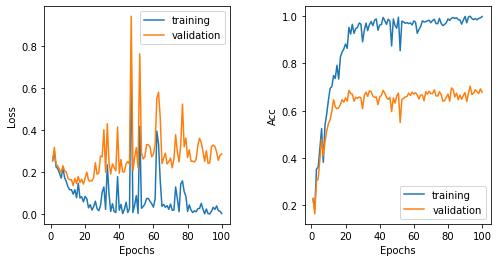

In [14]:
DL.train_model(trainloader,valloader,model,criterion,optimizer,100,device)
md_path='./torch_pth/nonsim/in_resnext1018d_10cla_e100_b16_lr0.001_adam.pth'
torch.save(model.state_dict(), md_path)

In [17]:
mean_list,std_list=DL.mean_std_dataset(trainset)
norm_trainset=DL.normalize_dataset(trainset,mean_list,std_list)
norm_valset=DL.normalize_dataset(valset,mean_list,std_list)
del trainset
del valset

In [18]:
del trainloader
del valloader

In [19]:
trainloader_norm = data.DataLoader(dataset=norm_trainset, batch_size=batch, shuffle=True)
valloader_norm = data.DataLoader(dataset=norm_valset, batch_size=batch)

エポック1 ,val_acc0.214 ,train_acc0.2126330402591393
epochtime:15.414871442317963分
エポック2 ,val_acc0.276 ,train_acc0.2947709393799167
epochtime:15.617038484414419分
エポック3 ,val_acc0.31 ,train_acc0.3360327009100725
epochtime:15.663674374421438分
エポック4 ,val_acc0.41 ,train_acc0.4285824463982724
epochtime:15.392913095156352分
エポック5 ,val_acc0.406 ,train_acc0.47431744562702455
epochtime:14.79478806257248分
エポック6 ,val_acc0.468 ,train_acc0.46830171217029154
epochtime:15.146697624524434分
エポック7 ,val_acc0.492 ,train_acc0.5570723430510566
epochtime:15.342020467917125分
エポック8 ,val_acc0.498 ,train_acc0.5954033626407528
epochtime:15.196214516957602分
エポック9 ,val_acc0.56 ,train_acc0.6648927965448095
epochtime:15.326825543244679分
エポック10 ,val_acc0.62 ,train_acc0.717414777109363
epochtime:15.53447490533193分
エポック11 ,val_acc0.626 ,train_acc0.7536634274255746
epochtime:15.644182988007863分
エポック12 ,val_acc0.628 ,train_acc0.76692889094555
epochtime:15.304303578535716分
エポック13 ,val_acc0.636 ,train_acc0.8037174147771093
epocht

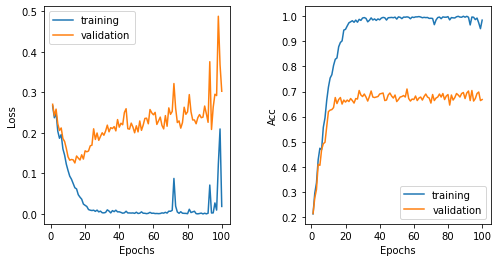

In [25]:
DL.train_model(trainloader_norm,valloader_norm,model,criterion,optimizer,100,device)
md_path='./torch_pth/nonsim/in_resnext1018d_10cla_e100_b16_lr0.001_adam_norm.pth'
torch.save(model.state_dict(), md_path)

In [ ]:
#データセットの平均、標準偏差保存
import numpy as np
mean_array=np.array(mean_list)
std_array=np.array(std_list)
np.save('./imagenet/train/train_sample/in_10cla_gray_mean',mean_array)
np.save('./imagenet/train/train_sample/in_10cla_gray_std',std_array)
mean=np.load('./imagenet/train/train_sample/in_10cla_gray_mean.npy')
std=np.load('./imagenet/train/train_sample/in_10cla_gray_std.npy')

In [ ]:
#転移学習、ファインチューニング


エポック1 ,val_acc0.15 ,train_acc0.17260527533549283
epochtime:1.172336427370707分
エポック2 ,val_acc0.2 ,train_acc0.21193891716797778
epochtime:1.1511335055033365分
エポック3 ,val_acc0.432 ,train_acc0.5015424957581367
epochtime:1.312816043694814分
エポック4 ,val_acc0.364 ,train_acc0.4383772944624402
epochtime:1.8935884396235148分
エポック5 ,val_acc0.414 ,train_acc0.5259910535246028
epochtime:1.864100408554077分
エポック6 ,val_acc0.34 ,train_acc0.4612833564707697
epochtime:1.8591622789700826分
エポック7 ,val_acc0.46 ,train_acc0.6196205460434984
epochtime:1.8441776831944783分
エポック8 ,val_acc0.226 ,train_acc0.3196822458738238
epochtime:1.8514632304509482分
エポック9 ,val_acc0.386 ,train_acc0.6165355545272251
epochtime:1.8213874260584513分
エポック10 ,val_acc0.232 ,train_acc0.3248496066635817
epochtime:1.8524301727612813分
エポック11 ,val_acc0.462 ,train_acc0.7822767237390097
epochtime:1.8330076018969217分
エポック12 ,val_acc0.466 ,train_acc0.8576276415239859
epochtime:1.8252761761347454分
エポック13 ,val_acc0.44 ,train_acc0.870507481104427
epochti

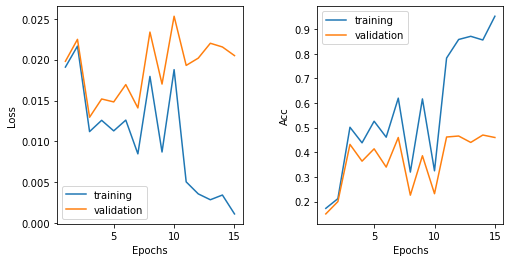

エポック1 ,val_acc0.304 ,train_acc0.32785747339194815
epochtime:1.436303726832072分
エポック2 ,val_acc0.396 ,train_acc0.4432361561005707
epochtime:1.458130419254303分
エポック3 ,val_acc0.462 ,train_acc0.5190498226129878
epochtime:1.4603612303733826分
エポック4 ,val_acc0.452 ,train_acc0.5478944932901435
epochtime:1.4431538542111715分
エポック5 ,val_acc0.516 ,train_acc0.6412926114453186
epochtime:1.4389946222305299分
エポック6 ,val_acc0.51 ,train_acc0.7093166743791455
epochtime:1.4386709849039714分
エポック7 ,val_acc0.518 ,train_acc0.7468764460897732
epochtime:1.4529401739438375分
エポック8 ,val_acc0.488 ,train_acc0.8213789912077741
epochtime:1.4418387532234191分
エポック9 ,val_acc0.502 ,train_acc0.8653401203146691
epochtime:1.4435057957967123分
エポック10 ,val_acc0.468 ,train_acc0.7720191269474009
epochtime:1.4375418464342753分
エポック11 ,val_acc0.486 ,train_acc0.9083757519666821
epochtime:1.4660464763641357分
エポック12 ,val_acc0.526 ,train_acc0.9035168903285516
epochtime:1.4842422048250834分
エポック13 ,val_acc0.458 ,train_acc0.8914082986271787
e

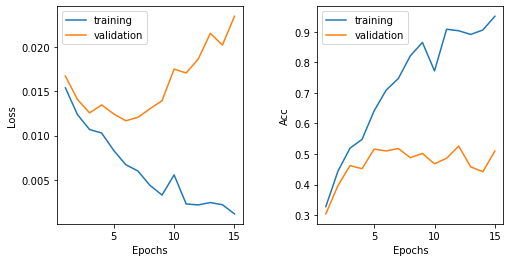

In [11]:
modellist=[]
optimizerlist=[]
criterion = nn.CrossEntropyLoss()
for i in range(2):
  modeltmp=my_model.in_ver5(10)
  modeltmp=modeltmp.to(device)
  optimizertmp = optim.Adam(modeltmp.parameters(), lr=0.001)
  modellist.append(modeltmp)
  optimizerlist.append(optimizertmp)


DL.train_model(trainloader,valloader,modellist[0],criterion,optimizerlist[0],15,device)
md_path='./torch_pth/nonsim/in_10cla_e15_b128_lr0.001_adam.pth'
torch.save(modellist[0].state_dict(), md_path)
DL.train_model(trainloader_norm,valloader_norm,modellist[1],criterion,optimizerlist[1],15,device)
md_path='./torch_pth/nonsim/in_10cla_e15_b128_lr0.001_norm_adam.pth'
torch.save(modellist[1].state_dict(), md_path)

In [6]:
criterion = nn.CrossEntropyLoss()
model=my_model.in_ver5(10)
model=model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

エポック1 ,val_acc0.3 ,train_acc0.342279808730526
epochtime:1.4949286897977194分
エポック2 ,val_acc0.366 ,train_acc0.3840814437760296
epochtime:1.4720137079556783分
エポック3 ,val_acc0.406 ,train_acc0.4601264846521672
epochtime:1.4793320178985596分
エポック4 ,val_acc0.394 ,train_acc0.5288446706771557
epochtime:1.4567936301231383分
エポック5 ,val_acc0.476 ,train_acc0.6358938762918402
epochtime:1.4553433140118917分
エポック6 ,val_acc0.494 ,train_acc0.6800863797624557
epochtime:1.4595946272214253分
エポック7 ,val_acc0.478 ,train_acc0.7431744562702453
epochtime:1.4406579931577046分
エポック8 ,val_acc0.486 ,train_acc0.7732531235539102
epochtime:1.4694995840390523分
エポック9 ,val_acc0.474 ,train_acc0.824695357087768
epochtime:1.4783199032147725分
エポック10 ,val_acc0.526 ,train_acc0.8980410303871664
epochtime:1.4743475834528605分
エポック11 ,val_acc0.484 ,train_acc0.8958044115378683
epochtime:1.4550432284673056分
エポック12 ,val_acc0.422 ,train_acc0.7860558383464445
epochtime:1.4507755994796754分
エポック13 ,val_acc0.448 ,train_acc0.9379916705229061
epo

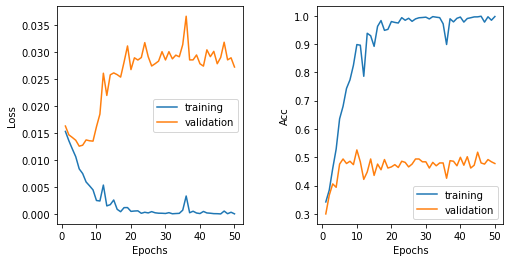

In [7]:
DL.train_model(trainloader_norm,valloader_norm,model,criterion,optimizer,50,device)
md_path='./torch_pth/in_10cla_e50_b128_adam_lr0.001_norm.pth'
torch.save(model.state_dict(), md_path)